# Import Libraries

## Base Libraries

## Installed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from genbit.genbit_metrics import GenBitMetrics

# Custom Functions

In [36]:
def gender_metrics(data: pd.Series, metric):
    all_metrics = []
    for idx, line in data.items():
        article_metrics = []
        metric.add_data(line, tokenized=False)
    # includes all gender metrics
        all_metrics.append(metric.get_metrics(output_statistics=True, output_word_list=False))
    return all_metrics

In [38]:
def access_metrics(data: list, metric: str):
    metric_list = []
    for item in data: 
        metric_list.append(item[metric])
    return metric_list

# Load Data

In [2]:
df_merged = pd.read_csv("MisInfoText_BuzzFeedWebis.csv")

In [3]:
df_merged.shape

(1645, 38)

In [4]:
df_merged.columns

Index(['author', 'hyperlink', 'mainText', 'orientation', 'paragraph', 'portal',
       'quote', 'title', 'uri', 'veracity', 'uri_enr', 'uri_enr_2',
       'uri_enr_2_parsed', 'uri_enr_2_parsed.scheme',
       'uri_enr_2_parsed.netloc', 'uri_enr_2_parsed.path',
       'uri_enr_2_parsed.params', 'uri_enr_2_parsed.query',
       'uri_enr_2_parsed.fragment', 'uri_enr_3', 'id', 'article_url',
       'article_veracity_label', 'article_body', 'article_source',
       'data_source', 'article_url_unshorten', 'article_url_enr',
       'article_url_enr_2', 'article_url_enr_3', 'article_url_enr_3_parsed',
       'article_url_enr_3_parsed.scheme', 'article_url_enr_3_parsed.netloc',
       'article_url_enr_3_parsed.path', 'article_url_enr_3_parsed.params',
       'article_url_enr_3_parsed.query', 'article_url_enr_3_parsed.fragment',
       'article_url_enr_4'],
      dtype='object')

# Data Correction

## Veracity Label

9 articles have different veracity labels.
For example, 1 article ('https://cnn.com/2016/09/27/politics/foreign-policy-debate-syria-trump-clinton') has two different veracity labels: Two variations have the label `nofact` and one has the label `mtrue`. As an analysis article, assign it to have "nofact" ("No factual content").

In [5]:
df_merged.groupby(["article_url_enr_2", "article_veracity_label"], dropna=False).size().reset_index().groupby("article_url_enr_2").filter(lambda x: len(x) > 1)

article_url_enr_2  \
0     http://100percentfedup.com/858-illegals-terror...   
1     http://100percentfedup.com/858-illegals-terror...   
151   http://clashdaily.com/2016/09/watch-hillary-he...   
152   http://clashdaily.com/2016/09/watch-hillary-he...   
212   http://eaglerising.com/36899/charity-clinton-f...   
213   http://eaglerising.com/36899/charity-clinton-f...   
390   http://occupydemocrats.com/2016/09/23/bombshel...   
391   http://occupydemocrats.com/2016/09/23/bombshel...   
401   http://occupydemocrats.com/2016/09/24/just-geo...   
402   http://occupydemocrats.com/2016/09/24/just-geo...   
421   http://occupydemocrats.com/2016/09/27/trump-ad...   
422   http://occupydemocrats.com/2016/09/27/trump-ad...   
611   http://usherald.com/photo-black-lives-matter-t...   
612   http://usherald.com/photo-black-lives-matter-t...   
957   https://cnn.com/2016/09/27/politics/foreign-po...   
958   https://cnn.com/2016/09/27/politics/foreign-po...   
1043  https://politico.com/magazine/story/2016/09/ro...   
1044  https://politico.com/magazine/story/2016/09/ro...   

     article_veracity_label  0  
0                   mixture  1  
1                     mtrue  1  
151                 mixture  1  
152                   mtrue  1  
212                  mfalse  1  
213                   mtrue  1  
390                  mfalse  1  
391                 mixture  1  
401                 mixture  1  
402                   mtrue  1  
421                 mixture  1  
422                   mtrue  1  
611                 mixture  1  
612                   mtrue  1  
957                   mtrue  2  
958                  nofact  2  
1043                  mtrue  1  
1044                 nofact  1

10 articles have different veracity ratings between the two sources. Manually reviewed all 10, and updated accordingly. 

In [6]:
df_merged.groupby(["veracity", "article_veracity_label"], dropna=False).size()

veracity                   article_veracity_label
mixture of true and false  mixture                    167
                           mtrue                        3
                           NaN                         45
mostly false               mfalse                      64
                           mixture                      1
                           mtrue                        1
                           NaN                         23
mostly true                mixture                      2
                           mtrue                     1111
                           nofact                       2
                           NaN                        153
no factual content         mtrue                        1
                           nofact                      55
                           NaN                          9
NaN                        mixture                      1
                           mtrue                        7
dtype: int64

In [7]:
# Mixture of true and false
# Mixture of true and false
# Mixture of true and false
df_merged[(df_merged["veracity"] == "mixture of true and false") & (df_merged["article_veracity_label"] == "mtrue")]["article_url_enr_2"].values

array(['http://clashdaily.com/2016/09/watch-hillary-heckler-screams-f-ck-hillary-stops-cold',
       'http://occupydemocrats.com/2016/09/24/just-georgia-cop-arrested-shooting-blaming-black-man',
       'http://100percentfedup.com/858-illegals-terror-hotbeds-get-full-citizenship-supposed-deported-video'],
      dtype=object)

In [8]:
# Appears to be Mostly True
df_merged[(df_merged["veracity"] == "mostly false") & (df_merged["article_veracity_label"] == "mixture")]["article_url_enr_2"].values

array(['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2'],
      dtype=object)

In [9]:
# Mostly False
df_merged[(df_merged["veracity"] == "mostly false") & (df_merged["article_veracity_label"] == "mtrue")]["article_url_enr_2"].values

array(['http://eaglerising.com/36899/charity-clinton-foundation-distributed-watered-down-aids-drugs-to-sub-saharan-africa'],
      dtype=object)

In [10]:
# Mixture of true and false
# Mixture of true and false
df_merged[(df_merged["veracity"] == "mostly true") & (df_merged["article_veracity_label"] == "mixture")]["article_url_enr_2"].values

array(['http://usherald.com/photo-black-lives-matter-thugs-outraged-4-word-message-trucker-put-back-truck',
       'http://occupydemocrats.com/2016/09/27/trump-advisor-giuliani-should-drop-out-of-debates'],
      dtype=object)

In [11]:
# No factual content (Analysis)
# No factual content (Opinion)
df_merged[(df_merged["veracity"] == "mostly true") & (df_merged["article_veracity_label"] == "nofact")]["article_url_enr_2"].values

array(['https://cnn.com/2016/09/27/politics/foreign-policy-debate-syria-trump-clinton',
       'https://politico.com/magazine/story/2016/09/robert-f-kennedy-donald-trump-party-of-war-214274'],
      dtype=object)

In [12]:
df_merged["article_veracity_label_cleaned"] = np.where(df_merged["article_url_enr_2"].isin(['http://clashdaily.com/2016/09/watch-hillary-heckler-screams-f-ck-hillary-stops-cold',
       'http://occupydemocrats.com/2016/09/24/just-georgia-cop-arrested-shooting-blaming-black-man',
       'http://100percentfedup.com/858-illegals-terror-hotbeds-get-full-citizenship-supposed-deported-video']), "mixture",
                                                       np.where(df_merged["article_url_enr_2"].isin(['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2']), "mtrue",
                                                                np.where(df_merged["article_url_enr_2"].isin(['http://eaglerising.com/36899/charity-clinton-foundation-distributed-watered-down-aids-drugs-to-sub-saharan-africa']), "mfalse",
                                                                        np.where(df_merged["article_url_enr_2"] == 'https://cnn.com/2016/09/27/politics/foreign-policy-debate-syria-trump-clinton', "nofact", df_merged["article_veracity_label"]))))

In [13]:
df_merged.groupby(["veracity", "article_veracity_label", "article_veracity_label_cleaned"], dropna=False).size()

veracity                   article_veracity_label  article_veracity_label_cleaned
mixture of true and false  mixture                 mixture                            167
                           mtrue                   mixture                              3
                           NaN                     NaN                                 45
mostly false               mfalse                  mfalse                              63
                                                   mtrue                                1
                           mixture                 mtrue                                1
                           mtrue                   mfalse                               1
                           NaN                     NaN                                 23
mostly true                mixture                 mixture                              2
                           mtrue                   mtrue                             1110
                  

In [14]:
df_merged[(df_merged["veracity"] == "mostly false") & (df_merged["article_veracity_label"] == "mfalse") & (df_merged["article_veracity_label_cleaned"] == "mtrue")]["article_url_enr_2"].values

array(['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2'],
      dtype=object)

In [15]:
df_merged[df_merged["article_url_enr_2"].isin(['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2'])][["article_url_enr_2", "article_veracity_label"]].values

array([['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2',
        'mixture'],
       ['http://occupydemocrats.com/2016/09/23/bombshell-abc-reveals-trump-paid-hundreds-millions-russian-oligarchs-2',
        'mfalse']], dtype=object)

## Article URL

In [16]:
# ABC News URLs need story ID, which earlier data cleaning had parsed out in `article_url_enr_4`
df_merged["article_url_cleaned"] = np.where(df_merged["article_source"] == "abcn.ws", 
                                            df_merged["article_url_enr_3"], 
                                            df_merged["article_url_enr_4"])

## Article Deduplication

Only preserve articles in MisInfoText for now.

In [17]:
df_merged = df_merged[~pd.isnull(df_merged["id"])]

In [18]:
df_merged.shape

(1415, 40)

### Deduplication by Article URL

In [19]:
df_merged = df_merged.drop_duplicates(["article_url_cleaned"])

In [20]:
df_merged.shape

(1371, 40)

### Deduplication by Article Body

Some articles from Freedom Daily and Conservative Byte have duplicated (and incorrect) article text. For such examples, deferring to content from BuzzFeed-Webis.

In [21]:
# df_merged[(df_merged["article_body"].duplicated()) & ~(df_merged["article_url_cleaned"].duplicated())]

In [22]:
df_merged["article_body_cleaned"] = np.where(df_merged["article_url_cleaned"].isin(['https://freedomdaily.com/breaking-bombshell-revelation-hillary-had-secret-surgery-this-year',
       'https://freedomdaily.com/dumbass-thugs-post-video-on-facebook-of-them-violently-robbing-old-man',
       'https://freedomdaily.com/kaepernick-takes-show-road-watch-hs-players-one-stupidity',
       'https://freedomdaily.com/dont-stop-sharing-this-viral-video-exposes-major-flaw-of-black-lives-matter',
       'https://conservativebyte.com/2016/09/hillary-bad-mouths-christians',
       'https://conservativebyte.com/2016/09/caddell-what-the-george-h-w-bush-endorsement-of-hillary-really-means',
       'https://freedomdaily.com/soros-spending-500-million-america',
       'https://freedomdaily.com/charlotte-thugs-leaves-cops-body-disgusting-thing',
       'https://freedomdaily.com/lol-watch-muslim-terrorist-blow-friends-taking-selfie-phone-detonator',
       'https://freedomdaily.com/video-obama-backed-moderate-syrian-rebels-threaten-kill-american-special-forces',
       'https://freedomdaily.com/disgusting-because-of-hillary-obama-ny-terrorist-will-get-better-treatment-than-us-vets',
       'https://freedomdaily.com/woman-on-school-board-asks-muslims-1-question-then-all-hell-breaks-loose',
       'https://freedomdaily.com/mall-terrorist-father-releases-statement-son-proves-liberals-will-spin-narrative',
       'https://freedomdaily.com/millennial-trump-supporter-tricks-elizabeth-warren-into-taking-a-selfie-drops-a-truth-bomb-on-her',
       'https://freedomdaily.com/watch-insane-moment-police-rush-child-suicide-bomber-seconds-from-pushing-button',
       'https://freedomdaily.com/america-bombed-twice-obama-jokes-terrorism',
       'https://conservativebyte.com/2016/09/top-economists-trump-will-grow-us-much-faster-than-hillary']), df_merged["mainText"], df_merged["article_body"])

# Finalize Dataset

In [23]:
df_merged = df_merged[["id", 'author', 'orientation', 'portal', 'title', "article_url_cleaned", "article_body_cleaned", "article_veracity_label_cleaned"]]

In [24]:
df_merged["id"] = df_merged["id"].astype(int)

In [25]:
df_merged["article_veracity_label_cleaned"] = np.where(df_merged["article_veracity_label_cleaned"] == "mfalse", "mostly false",
                                                      np.where(df_merged["article_veracity_label_cleaned"] == "mixture", "mixture of true and false",
                                                              np.where(df_merged["article_veracity_label_cleaned"] == "mtrue", "mostly true",
                                                                      np.where(df_merged["article_veracity_label_cleaned"] == "nofact", "no factual content", df_merged["article_veracity_label_cleaned"]))))

# EDA

In [29]:
df_merged.shape

(1371, 8)

In [26]:
df_merged.groupby(["article_veracity_label_cleaned"], dropna=False).size()

article_veracity_label_cleaned
mixture of true and false     167
mostly false                   63
mostly true                  1085
no factual content             56
dtype: int64

In [27]:
df_merged.groupby(['orientation'], dropna=False).size()

orientation
left          213
mainstream    739
right         411
NaN             8
dtype: int64

In [28]:
df_merged.groupby(['portal'], dropna=False).size()

portal
abc                  84
addicting-info      127
cnn                 267
eagle-rising        172
freedom-daily        26
occupy-democrats     84
politico            388
right-wing-news     213
the-other-98          2
NaN                   8
dtype: int64

In [41]:
df_merged.groupby(['orientation', 'portal'], dropna=False).size()

orientation  portal          
left         addicting-info      127
             occupy-democrats     84
             the-other-98          2
mainstream   abc                  84
             cnn                 267
             politico            388
right        eagle-rising        172
             freedom-daily        26
             right-wing-news     213
NaN          NaN                   8
dtype: int64

## Gender Bias Analysis

In [33]:
language = "en"
metric = GenBitMetrics(language, context_window=5, distance_weight=0.95,
                 percentile_cutoff=80)

2023-09-08 18:07:39 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

2023-09-08 18:07:55 INFO: Finished downloading models and saved to /home/thispc/anaconda3/envs/DM/lib/python3.9/site-packages/genbit/stanza_lemmatizers.


### Political Orientation of News Outlet

In [37]:
left_all_metrics = gender_metrics(df_merged[df_merged["orientation"] == "left"]['article_body_cleaned'], metric)
main_all_metrics = gender_metrics(df_merged[df_merged["orientation"] == "mainstream"]['article_body_cleaned'], metric)
right_all_metrics = gender_metrics(df_merged[df_merged["orientation"] == "right"]['article_body_cleaned'], metric)

In [39]:
left_pct_f = access_metrics(left_all_metrics, 'percentage_of_female_gender_definition_words')
main_pct_f = access_metrics(main_all_metrics, 'percentage_of_female_gender_definition_words')
right_pct_f = access_metrics(right_all_metrics, 'percentage_of_female_gender_definition_words')

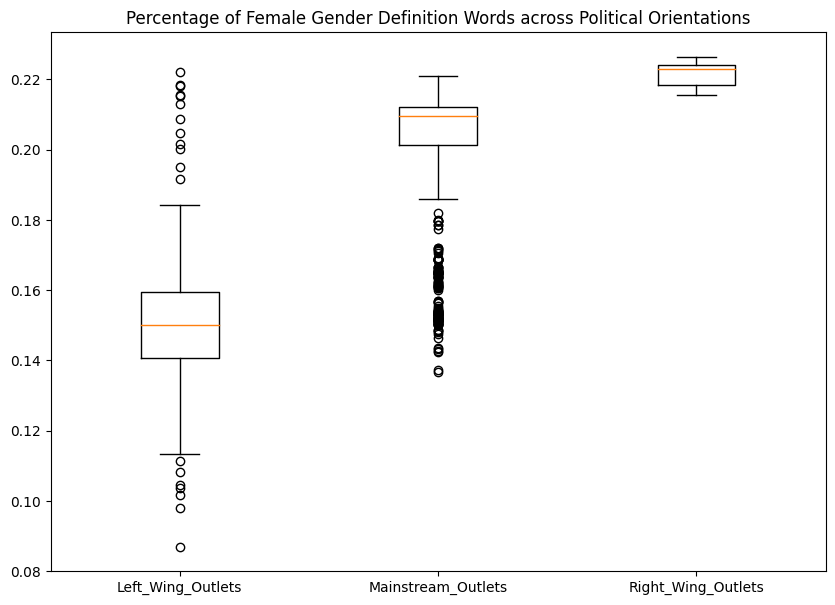

In [40]:
percentage_female = [left_pct_f, main_pct_f, right_pct_f]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(percentage_female)
ax.set_xticklabels(['Left_Wing_Outlets', 'Mainstream_Outlets',
                    'Right_Wing_Outlets'])
plt.title("Percentage of Female Gender Definition Words across Political Orientations")
plt.show()

### Article Veracity Label

In [42]:
mtrue_all_metrics = gender_metrics(df_merged[df_merged["article_veracity_label_cleaned"] == "mostly true"]['article_body_cleaned'], metric)
mixture_all_metrics = gender_metrics(df_merged[df_merged["article_veracity_label_cleaned"] == "mixture of true and false"]['article_body_cleaned'], metric)
mfalse_all_metrics = gender_metrics(df_merged[df_merged["article_veracity_label_cleaned"] == "mostly false"]['article_body_cleaned'], metric)
nofact_all_metrics = gender_metrics(df_merged[df_merged["article_veracity_label_cleaned"] == "no factual content"]['article_body_cleaned'], metric)

In [43]:
mtrue_pct_f = access_metrics(mtrue_all_metrics, 'percentage_of_female_gender_definition_words')
mixture_pct_f = access_metrics(mixture_all_metrics, 'percentage_of_female_gender_definition_words')
mfalse_pct_f = access_metrics(mfalse_all_metrics, 'percentage_of_female_gender_definition_words')
nofact_pct_f = access_metrics(nofact_all_metrics, 'percentage_of_female_gender_definition_words')

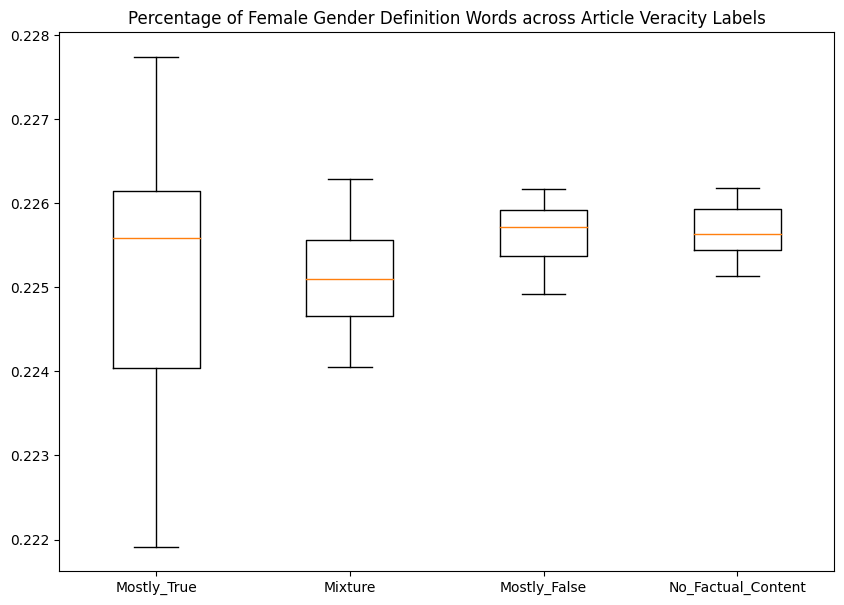

In [44]:
percentage_female = [mtrue_pct_f, mixture_pct_f, mfalse_pct_f, nofact_pct_f]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(percentage_female)
ax.set_xticklabels(['Mostly_True', 'Mixture',
                    'Mostly_False', 'No_Factual_Content'])
plt.title("Percentage of Female Gender Definition Words across Article Veracity Labels")
plt.show()

### Article Outlets

In [45]:
abc_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "abc"]['article_body_cleaned'], metric)
addictinginfo_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "addicting-info"]['article_body_cleaned'], metric)
cnn_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "cnn"]['article_body_cleaned'], metric)
eaglerising_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "eagle-rising"]['article_body_cleaned'], metric)
freedomdaily_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "freedom-daily"]['article_body_cleaned'], metric)
occupydemocrats_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "occupy-democrats"]['article_body_cleaned'], metric)
politico_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "politico"]['article_body_cleaned'], metric)
rightwingnews_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "right-wing-news"]['article_body_cleaned'], metric)
other98_all_metrics = gender_metrics(df_merged[df_merged["portal"] == "the-other-98"]['article_body_cleaned'], metric)

In [46]:
abc_pct_f = access_metrics(abc_all_metrics, 'percentage_of_female_gender_definition_words')
addictinginfo_pct_f = access_metrics(addictinginfo_all_metrics, 'percentage_of_female_gender_definition_words')
cnn_pct_f = access_metrics(cnn_all_metrics, 'percentage_of_female_gender_definition_words')
eaglerising_pct_f = access_metrics(eaglerising_all_metrics, 'percentage_of_female_gender_definition_words')

freedomdaily_pct_f = access_metrics(freedomdaily_all_metrics, 'percentage_of_female_gender_definition_words')
occupydemocrats_pct_f = access_metrics(occupydemocrats_all_metrics, 'percentage_of_female_gender_definition_words')
politico_pct_f = access_metrics(politico_all_metrics, 'percentage_of_female_gender_definition_words')
rightwingnews_pct_f = access_metrics(rightwingnews_all_metrics, 'percentage_of_female_gender_definition_words')

other98_pct_f = access_metrics(other98_all_metrics, 'percentage_of_female_gender_definition_words')

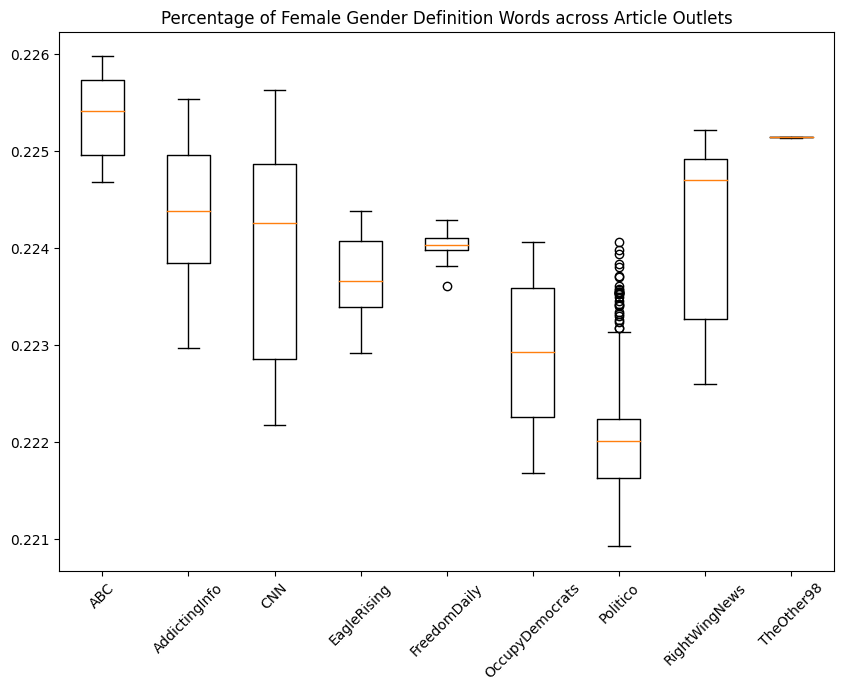

In [48]:
percentage_female = [abc_pct_f, addictinginfo_pct_f, cnn_pct_f,
                     eaglerising_pct_f, freedomdaily_pct_f, occupydemocrats_pct_f,
                     politico_pct_f, rightwingnews_pct_f, other98_pct_f
                    ]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(percentage_female)
ax.set_xticklabels(['ABC', 'AddictingInfo', 'CNN',
                    'EagleRising', 'FreedomDaily', 'OccupyDemocrats',
                   'Politico', 'RightWingNews', 'TheOther98'])
plt.title("Percentage of Female Gender Definition Words across Article Outlets")
plt.xticks(rotation=45)
plt.show()

In [26]:
#df_merged.to_csv("MisInfoText_BuzzFeedWebis_cleaned.csv", index=False)